<a href="https://colab.research.google.com/github/TJConnellyContingentMacro/NU422/blob/master/PCA_and_RF_on_MNIST_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis & Random Forest Classifiers on MNIST

compete in the Kaggle.com Digit Recognizer competition which involves classical digit recognition from hand-written images. https://www.kaggle.com/c/digit-recognizer/ 

This binary classification task is NOT what is required for the current assignment. In this assignment we are asking for a multiclass classifier. The entire MNIST data set will be used for input data. For this assignment, you will develop a classifier that may be used to predict which of the 10 digits is being written.  

(1) Begin by fitting a random forest classifier using the full set of 784 explanatory variables and the model training set (train.csv). Record the time it takes to fit the model and then evaluate the model on the test.csv data by submitting to Kaggle.com. Provide your Kaggle.com score and user ID.

(2) Execute principal components analysis (PCA) on the combined training and test set data together, generating principal components that represent 95 percent of the variability in the explanatory variables. The number of principal components in the solution should be substantially fewer than the 784 explanatory variables. Record the time it takes to identify the principal components.

(3) Using the identified principal components from step (2), use the train.csv to build another random forest classifier. Record the time it takes to fit the model and to evaluate the model on the test.csv data by submitting to Kaggle.com. Provide your Kaggle.com score and user ID.

(4) Submit both the RF Classifier and the PCA RF Classifier to Kaggle.com, and report both scores along with your user name.  I MUST have your user name to verify submission status.

(5) The experiment we have proposed has a MAJOR design flaw. Identify the flaw. Fix it. Rerun the experiment in a way that is consistent with a training-and-test regimen, and submit this to Kaggle.com. Provide your Kaggle.com score and user ID.

Report total elapsed time measures for the training set analysis.  It is sufficient to run a single time-elapsed test for this assignment. In practice, we might consider the possibility of repeated executions of the relevant portions of the programs, much as the Benchmark Example programs do. Some code that might help you with reporting elapsed total time follows. 

## Useful Links


https://scikit-learn.org/stable/modules/model_evaluation.html


Classification Report:  https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html

CNN on MNIST data with tensor flow and some good graphics: https://www.kaggle.com/ishansoni/digit-recognizer-mnist-dataset

Manually calc'g PCA eignvalues and plot: https://towardsdatascience.com/visualizing-principal-component-analysis-with-matrix-transforms-d17dabc8230e

This study suggested PCA on classifiers was useful:  https://towardsdatascience.com/dimensionality-reduction-does-pca-really-improve-classification-outcome-6e9ba21f0a32

https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Image_Reconstruction_and_such.ipynb

## Management Problem

From a management perspective, the predictive accuracy of models must be weighed against the costs of model development and implementation. Suppose you were the manager of a data science team responsible for implementing models for computer vision (classification of images analogous to the MINST problem). Would you recommend using PCA as a preliminary to machine learning classification? Explain your thinking.

# Libraries and Ingest

In [1]:
import pandas as pd

import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
%matplotlib inline

import seaborn as sns  # pretty plotting, including heat map
plt.style.use('fivethirtyeight')

from datetime import datetime

# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.png', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)


from sklearn.preprocessing import OrdinalEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# BernoulliNB is designed for binary/boolean features
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import roc_auc_score   
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import export_graphviz


from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.regressor import ManualAlphaSelection
from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot

from sklearn.pipeline import Pipeline



from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)




import warnings
warnings.filterwarnings("ignore")

# import base packages into the namespace for this program
import numpy as np
import pandas as pd

import os

PROJECT_ROOT_DIR = ""
CHAPTER_ID = ""

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    
def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "", CHAPTER_ID, fig_id)

print("All Packages and a Correlation Chart function loaded.  WARNING - this was created in April, 2019 and warnings were supressed.")

All Packages and a Correlation Chart function loaded.  WARNING - this was created in April, 2019 and warnings were supressed.


In [0]:
train = pd.read_csv('s3://terrenceconnelly/DigitRecog_train.csv')
test = pd.read_csv('s3://terrenceconnelly/DigitRecog_test.csv')

# EDA

In [3]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [4]:
test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [5]:
test.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

***Note***: since this won't be submitted to Kaggle, where one could get the correct labels for the test set, instead just use standard split of test/train data for the "test.csv" data

In [0]:
y = train["label"]
x = train.drop(labels = ["label"], axis = 1) 


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state=11)

# VERBOSITY = 1
# EPOCHS = 100
# BATCH_SIZE = 512
# CLASSES = 10
# CHANNELS = 1
# IMAGE_SIZE = 28
# IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
# VALIDATION_RATIO = 0.1

# x = x.values.reshape(-1, IMAGE_WIDTH, IMAGE_HEIGHT, CHANNELS)
# test = test.values.reshape(-1, IMAGE_WIDTH, IMAGE_HEIGHT, CHANNELS)

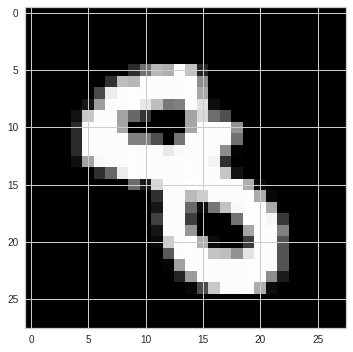

In [7]:
pic1 = y.loc[67]
pic2 = x.loc[67]
pic2 = np.array(pic2, dtype = 'uint8')
pic2 = pic2.reshape(28,28)
plt.imshow(pic2, cmap = 'gray')
plt.show()

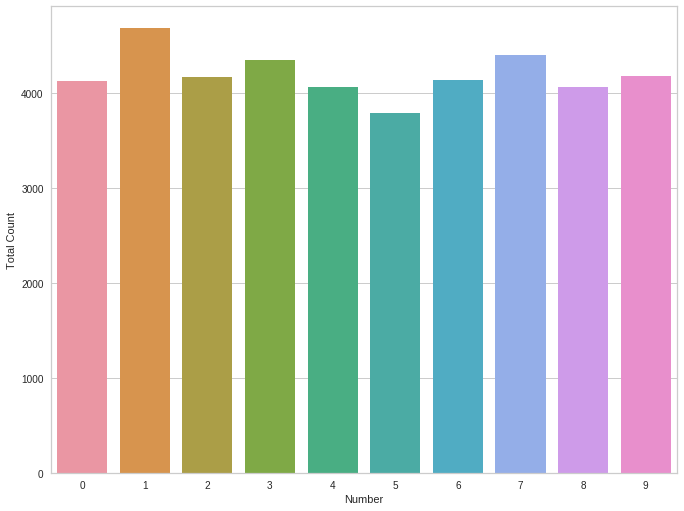

In [8]:
sns.countplot(x = "label", data = train)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.xlabel("Number")
plt.ylabel("Total Count")
plt.show()

# Modeling & Analysis

## Random Forest Classifiers with max features and 10 estimators

In [0]:
rfc = RandomForestClassifier(max_features = 'sqrt', n_estimators = 10, bootstrap = True)


In [10]:
y[9]

3

In [11]:
start=datetime.now()

rfc.fit(X_train, y_train)

end=datetime.now()
print(end-start)


0:00:02.524169


In [12]:
y_pred = rfc.predict(X_test)
rfc.score(X_test, y_test)

0.9367857142857143

In [13]:
y_pred.shape

(8400,)

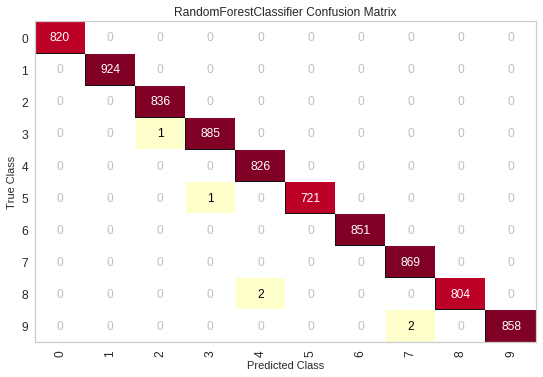

In [14]:
 cm = ConfusionMatrix(rfc, classes=[0,1,2,3,4,5,6,7,8,9])
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-

cm.fit(X_test, y_test)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the

# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)
# How did we do?
cm.poof()

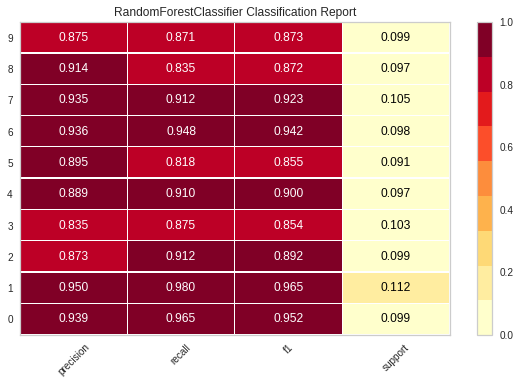

In [15]:
visualizer = ClassificationReport(rfc, support = 'percent')

visualizer.fit(X_test, y_test)
visualizer.score(X_train, y_train)  # Evaluate the model on the test data
visualizer.poof()   

In [16]:
accuracy_score(y_pred, y_test)

0.9367857142857143

## PCA

In [17]:
pca = PCA(n_components = 2)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [18]:
print(pca.explained_variance_ratio_)  

[0.098 0.071]


Text(0.5, 0.98, '2-Component PCA')

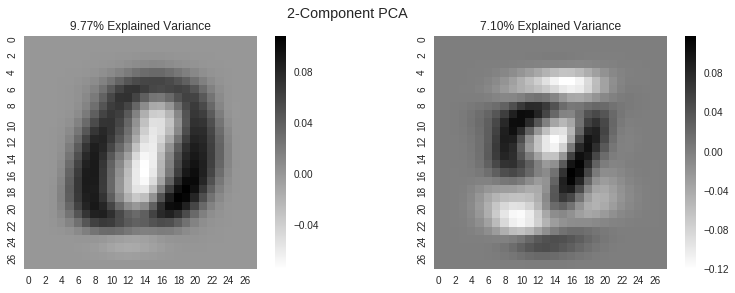

In [19]:
fig, axarr = plt.subplots(1, 2, figsize=(12, 4))

sns.heatmap(pca.components_[0, :].reshape(28, 28), ax=axarr[0], cmap='gray_r')
sns.heatmap(pca.components_[1, :].reshape(28, 28), ax=axarr[1], cmap='gray_r')
axarr[0].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[0]*100),
    fontsize=12
)
axarr[1].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[1]*100),
    fontsize=12
)
axarr[0].set_aspect('equal')
axarr[1].set_aspect('equal')

plt.suptitle('2-Component PCA')

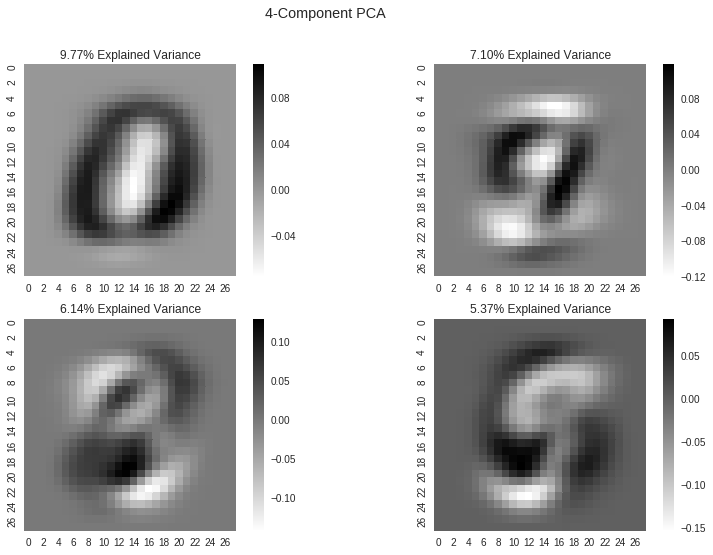

In [20]:
pca = PCA(n_components = 4)
pca.fit(X_train)
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

sns.heatmap(pca.components_[0, :].reshape(28, 28), ax=axarr[0][0], cmap='gray_r')
sns.heatmap(pca.components_[1, :].reshape(28, 28), ax=axarr[0][1], cmap='gray_r')
sns.heatmap(pca.components_[2, :].reshape(28, 28), ax=axarr[1][0], cmap='gray_r')
sns.heatmap(pca.components_[3, :].reshape(28, 28), ax=axarr[1][1], cmap='gray_r')

axarr[0][0].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[0]*100),
    fontsize=12
)
axarr[0][1].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[1]*100),
    fontsize=12
)
axarr[1][0].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[2]*100),
    fontsize=12
)
axarr[1][1].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[3]*100),
    fontsize=12
)
axarr[0][0].set_aspect('equal')
axarr[0][1].set_aspect('equal')
axarr[1][0].set_aspect('equal')
axarr[1][1].set_aspect('equal')

plt.suptitle('4-Component PCA')
pass


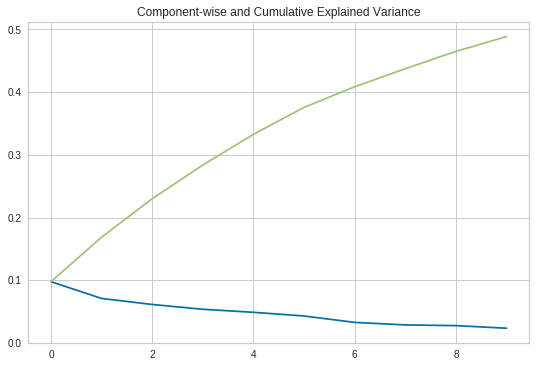

In [21]:
pca = PCA(n_components=10)
X_r = pca.fit(X_train).transform(X_train)

plt.plot(range(10), pca.explained_variance_ratio_)
plt.plot(range(10), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")
pass

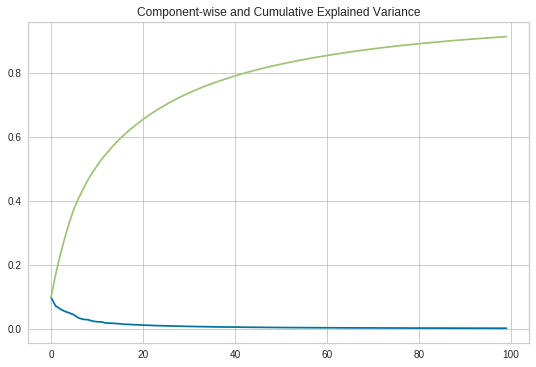

In [22]:
pca = PCA(n_components = 100)
X_r = pca.fit(X_train).transform(X_train)

plt.plot(range(100), pca.explained_variance_ratio_)
plt.plot(range(100), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")
pass

In [23]:
start=datetime.now()

pca = PCA(.95)

# lower_dimensional_data = pca.fit_transform(X_train)

# pca.n_components_




end=datetime.now()
print(end-start)


0:00:00.000116


In [24]:

lower_dimensional_data = pca.fit_transform(X_train)
lower_dimensional_data 

array([[1108.721, -212.45 ,   43.82 , ...,   -2.914,   29.033,   38.117],
       [ 740.286,   -8.657,  137.886, ...,   50.75 ,   33.467,  -18.253],
       [-425.294, -131.462,  433.672, ...,  -57.646,  -12.519, -121.82 ],
       ...,
       [-501.274,   75.202,  284.775, ...,   64.075,  -12.235,    2.476],
       [-152.873,  824.379, -404.13 , ...,   46.638,  -49.95 ,  -14.432],
       [ 729.171,  361.675, 1108.562, ...,    3.017,   44.736,  -38.81 ]])

In [25]:
pca.n_components_

153

In [26]:
X_r = pca.fit(X_train).transform(X_train)
X_r

array([[1108.721, -212.45 ,   43.82 , ...,   -2.914,   29.033,   38.117],
       [ 740.286,   -8.657,  137.886, ...,   50.75 ,   33.467,  -18.253],
       [-425.294, -131.462,  433.672, ...,  -57.646,  -12.519, -121.82 ],
       ...,
       [-501.274,   75.202,  284.775, ...,   64.075,  -12.235,    2.476],
       [-152.873,  824.379, -404.13 , ...,   46.638,  -49.95 ,  -14.432],
       [ 729.171,  361.675, 1108.562, ...,    3.017,   44.736,  -38.81 ]])

In [0]:
tot = sum(pca.explained_variance_)
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
cum_var_exp = np.cumsum(var_exp)


In [28]:
cum_var_exp.shape

(153,)

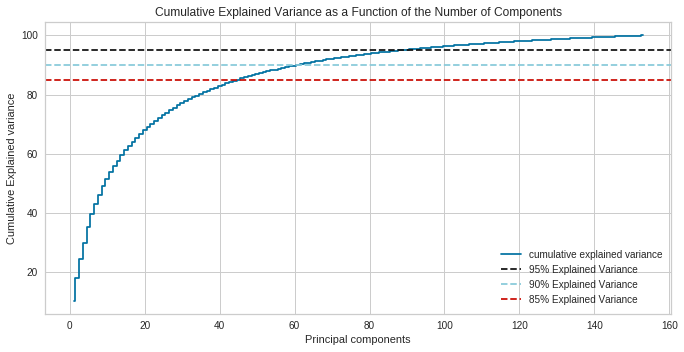

In [29]:

plt.figure(figsize=(10, 5))
plt.step(range(1, 154), cum_var_exp, where='mid',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()


### Run RFC with unlimited esimators

In [0]:
rfc =RandomForestClassifier()

In [31]:
start=datetime.now()

rfc.fit(X_train, y_train)

end=datetime.now()
print("TIME TO RUN RFC on original TRAIN data: " + str(end-start))

TIME TO RUN RFC on original TRAIN data: 0:00:02.717426


In [32]:
rfc.score(X_train, y_train)

0.9990178571428572

In [33]:
start=datetime.now()

rfc.fit(X_r, y_train)

end=datetime.now()
print(end-start)
print("TIME TO RUN RFC on PCA train data: " + str(end-start))

0:00:04.724120
TIME TO RUN RFC on PCA train data: 0:00:04.724120


In [34]:
# y_pred = rfc.predict(X_r)
rfc.score(X_r, y_train)

0.9988095238095238

In [0]:
X_pcatest = pca.fit(X_test).transform(X_test)


In [36]:
start=datetime.now()

rfc.fit(X_pcatest, y_test)

end=datetime.now()

print("TIME TO RUN RFC on PCA TEST data: " + str(end-start))


TIME TO RUN RFC on PCA TEST data: 0:00:00.903296


In [37]:
rfc.score(X_pcatest, y_test)

0.998452380952381

In [38]:
start=datetime.now()

rfc.fit(X_test, y_test)


end=datetime.now()
print("TIME TO RUN RFC on TEST data (no PCA): " + str(end-start))

TIME TO RUN RFC on TEST data (no PCA): 0:00:00.425708


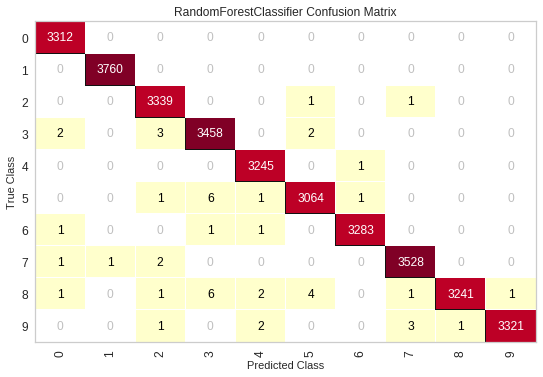

In [39]:
 cm = ConfusionMatrix(rfc, classes=[0,1,2,3,4,5,6,7,8,9])
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-

cm.fit(X_r, y_train)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the

# and then creates the confusion_matrix from scikit-learn.
cm.score(X_r, y_train)
# How did we do?
cm.poof()

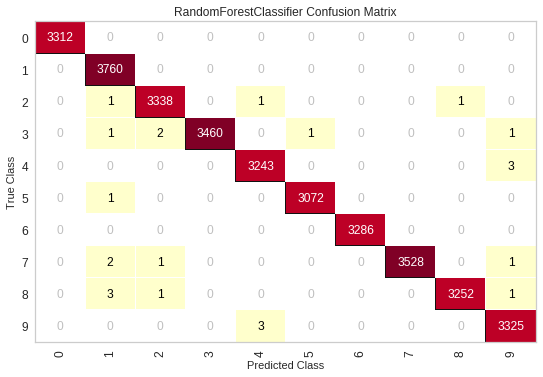

In [40]:
 cm = ConfusionMatrix(rfc, classes=[0,1,2,3,4,5,6,7,8,9])
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-

cm.fit(X_train, y_train)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the

# and then creates the confusion_matrix from scikit-learn.
cm.score(X_train, y_train)
# How did we do?
cm.poof()

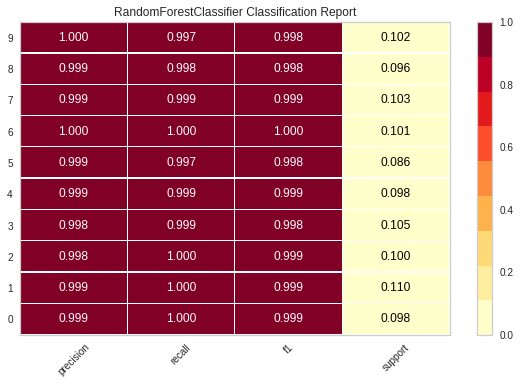

In [41]:
visualizer = ClassificationReport(rfc, support = 'percent')

visualizer.fit(X_pcatest, y_test)
visualizer.score(X_pcatest, y_test)  # Evaluate the model
visualizer.poof()   

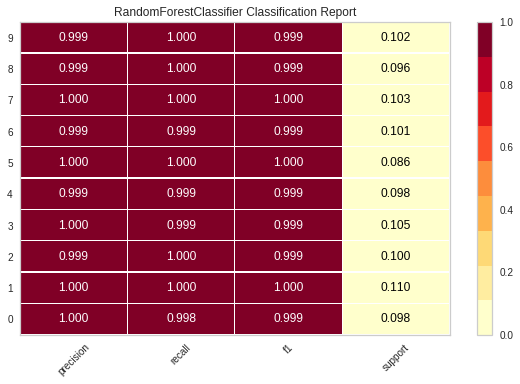

In [42]:
visualizer = ClassificationReport(rfc, support = 'percent')

visualizer.fit(X_test, y_test)
visualizer.score(X_test, y_test)  # Evaluate the model
visualizer.poof()   